In [1]:
import sys
sys.path.append('..')
from par_segmentation import *
from matplotlib import animation
from matplotlib_polyroi import RoiJupyter
%matplotlib notebook

This notebook demonstrates the segmentation/quantification procedure using an image of NeonGreen-tagged PAR-2(L109R) in a C. elegans zygote. The image has been autofluorescence corrected using SAIBR.

To run, click Kernel > Restart & Run All

### Load image

In [2]:
img = load_image('nwg338_af_corrected.tif')

<IPython.core.display.Javascript object>


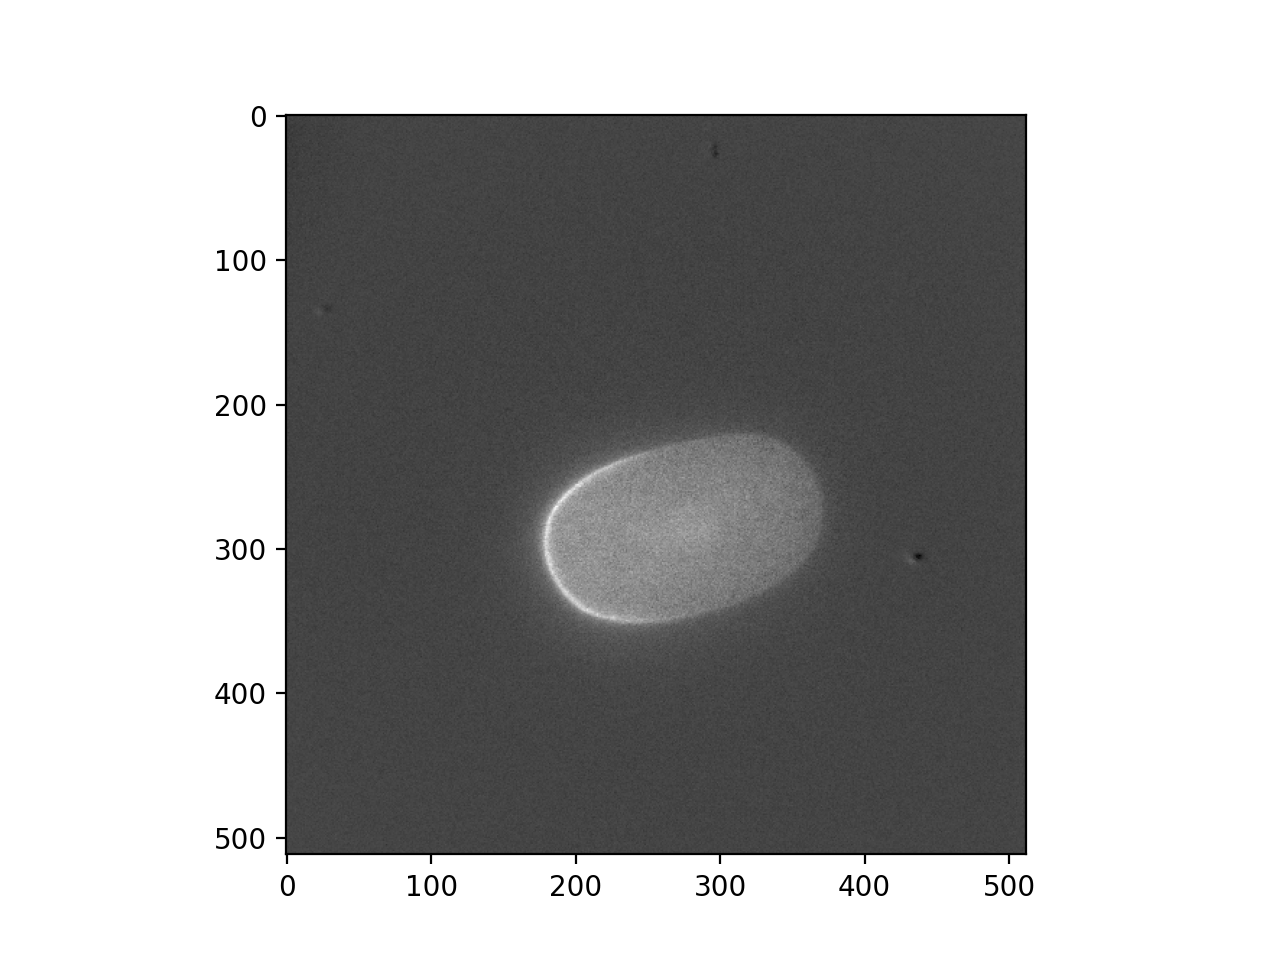

In [3]:
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

### Initial ROI

Draw a preliminary ROI on the image using RoiJupyter (or just load pre-defined ROI)

In [4]:
# r = RoiJupyter(img, periodic=True, spline=True)
# r.run()

In [5]:
# np.savetxt('nwg338_ROI_manual.txt', r.roi)

In [6]:
roi = np.loadtxt('nwg338_ROI_manual.txt')

<IPython.core.display.Javascript object>


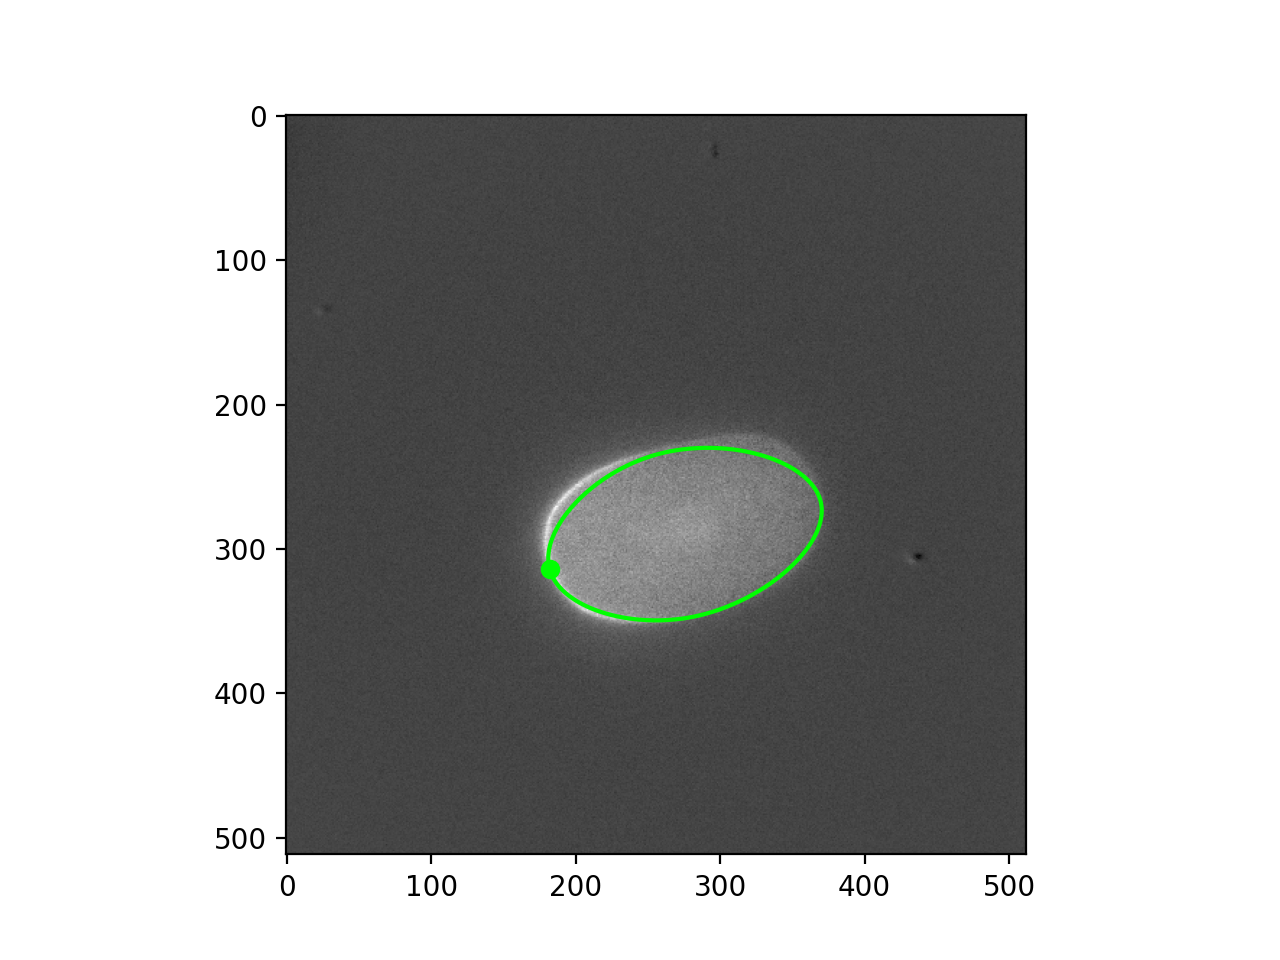

In [7]:
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.plot(roi[:, 0], roi[:, 1], c='lime')
ax.scatter(roi[0, 0], roi[0, 1], c='lime')

### Run quantification and segmentation

Segmentation and quantification is performed using the ImageQuant class

In [8]:
# Uncomment to see documentation:
# help(ImageQuant)  

__Set up class__. The underlying quantification model has a single parameter, sigma, which is related to the point spread function. By setting adaptive_sigma=True this parameter is trained on the image and does not need to be specified beforehand.

In [9]:
iq = ImageQuant(img=img, roi=roi, adaptive_sigma=True)

__Run__

In [10]:
iq.run()

  0%|          | 0/400 [00:00<?, ?it/s]

Iteration 1 of 2


  0%|          | 0/400 [00:00<?, ?it/s]

Iteration 2 of 2


100%|██████████| 400/400 [00:07<00:00, 54.98it/s]


Time elapsed: 15.46 seconds 



### Sanity checks

Check the loss curve to make sure optimisation has stabilised:

<IPython.core.display.Javascript object>


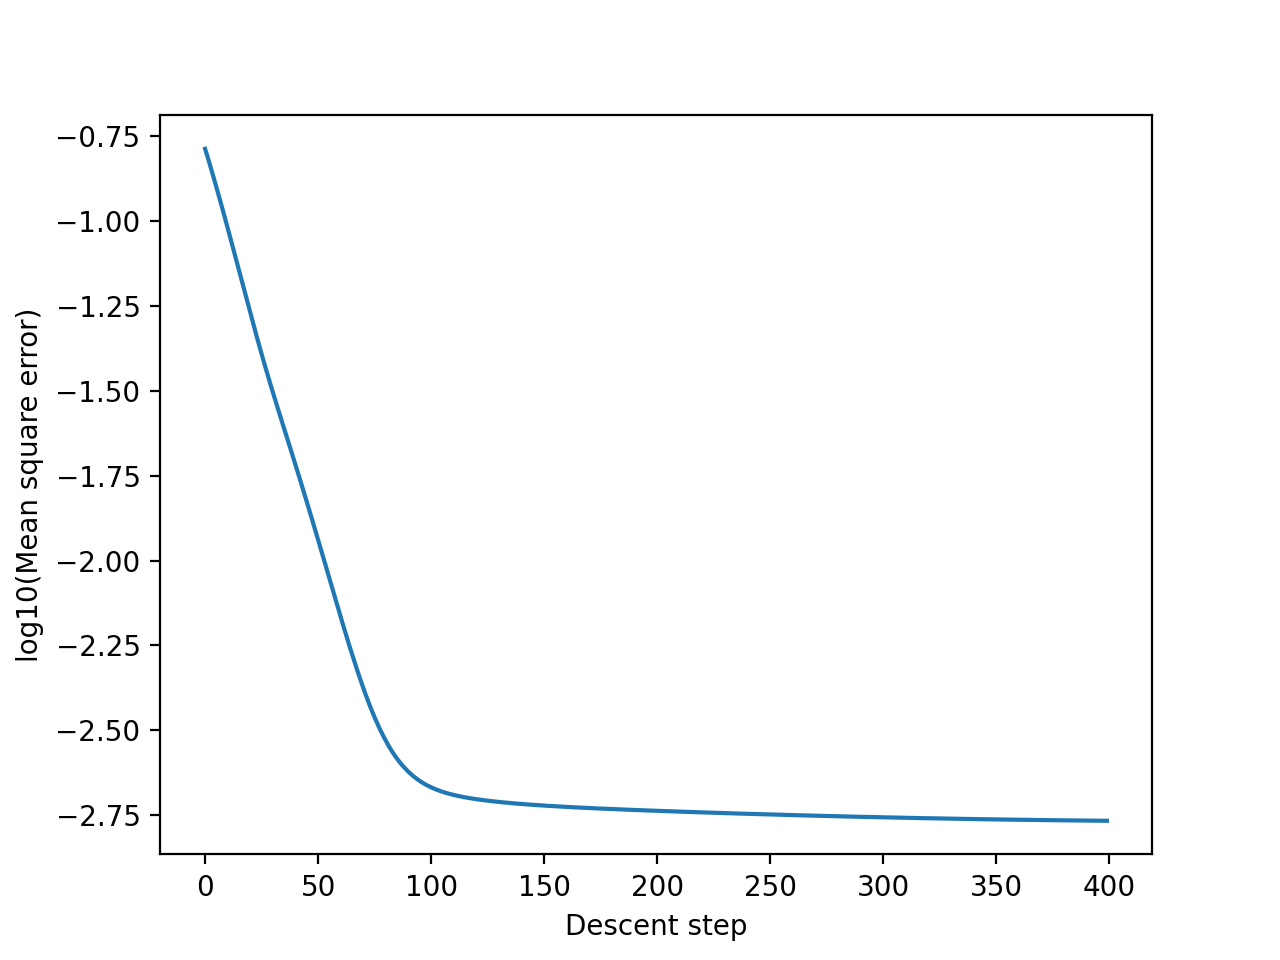

In [11]:
iq.plot_losses(log=True)

Plot fits to make sure they look appropriate (use slider to scroll along the image):

<IPython.core.display.Javascript object>


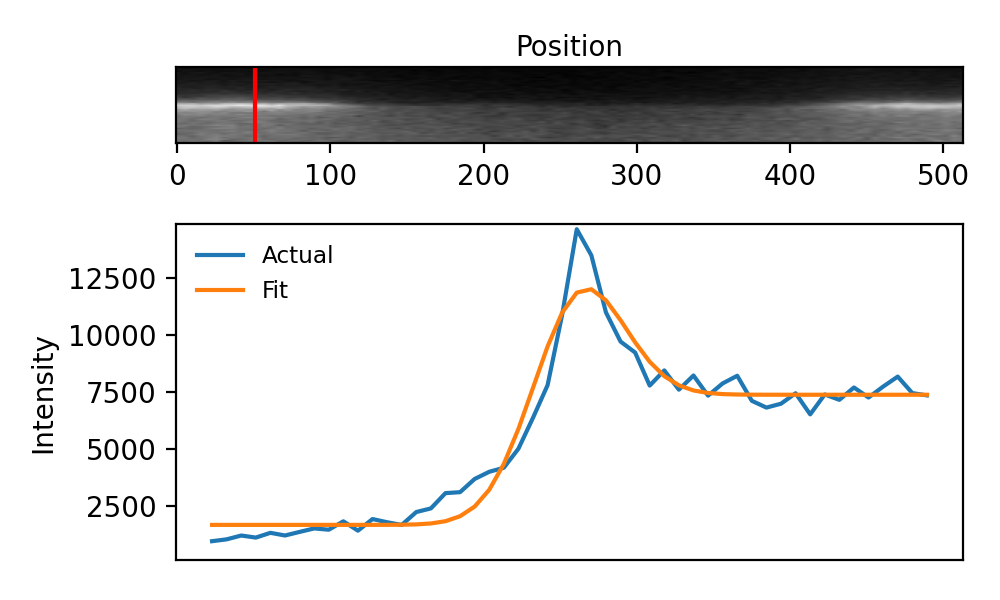

interactive(children=(FloatSlider(value=0.1, description='Position', max=1.0, step=0.01), Output()), _dom_clas…

(<Figure size 500x300 with 2 Axes>,
 (<AxesSubplot:xlabel='Position'>, <AxesSubplot:ylabel='Intensity'>))

In [12]:
iq.plot_fits()

### Segmentation results

<IPython.core.display.Javascript object>


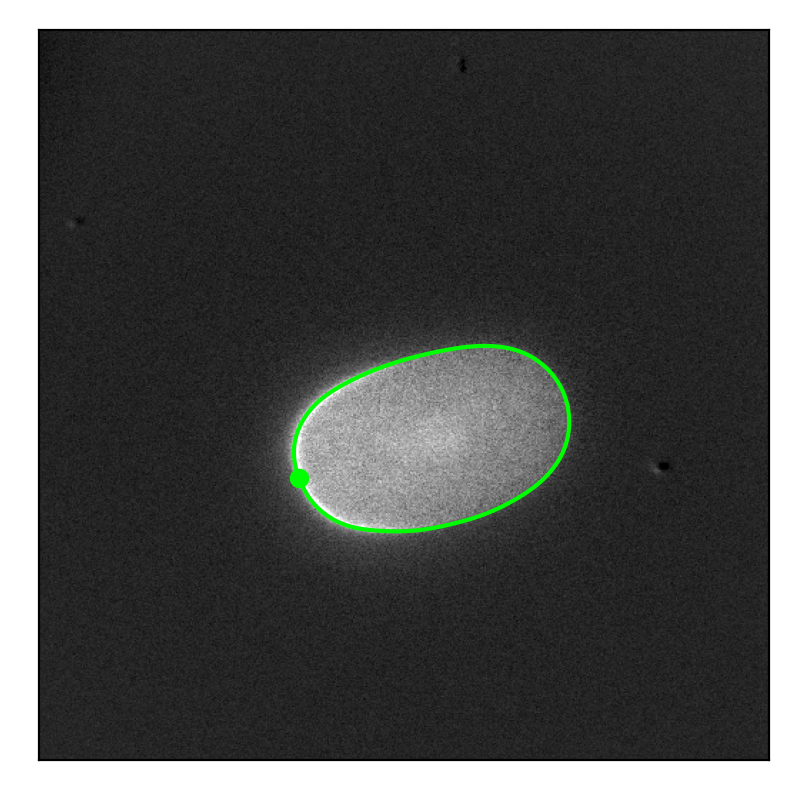

(<Figure size 400x400 with 1 Axes>, <AxesSubplot:>)

In [13]:
iq.plot_segmentation()

The new ROI can be accessed at iq.roi

### Quantification results

<IPython.core.display.Javascript object>


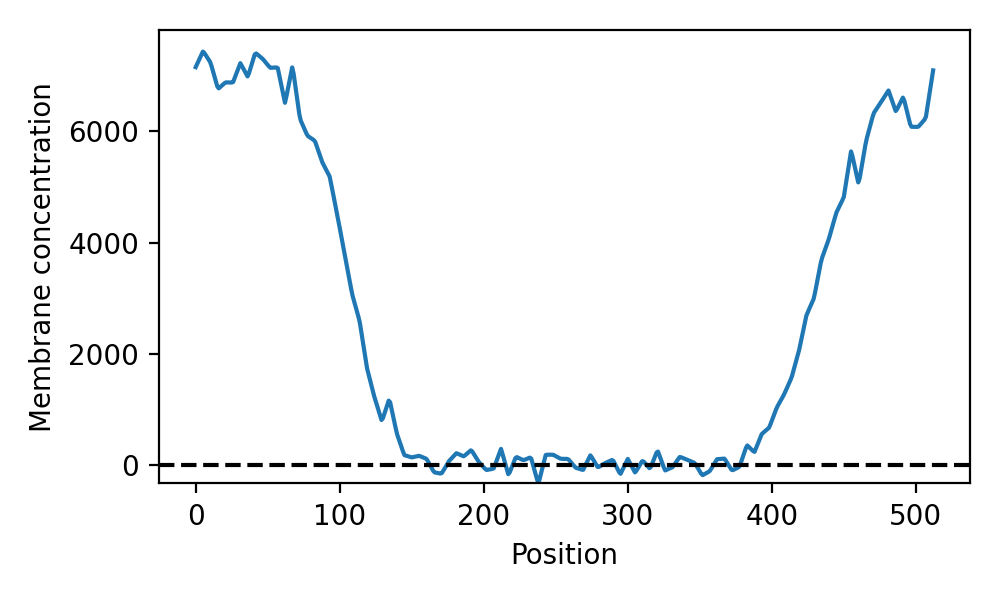

(<Figure size 500x300 with 1 Axes>,
 <AxesSubplot:xlabel='Position', ylabel='Membrane concentration'>)

In [14]:
iq.plot_quantification()

Compile quantificiation results into a pandas dataframe. Here, you will see 100 positions which correspond to 100 evenly spaced points around the embryo circumference

In [15]:
quantification = iq.compile_res()
quantification

,Frame,Position,Membrane signal,Cytoplasmic signal
0,0,0,7153.347637,7069.258298
1,0,1,7442.525166,7133.952789
2,0,2,7233.985305,7023.271473
3,0,3,6761.502414,7322.594853
4,0,4,6880.154077,7363.920130
...,...,...,...,...
95,0,95,6622.210246,7125.606255
96,0,96,6083.124151,7246.612570
97,0,97,6079.930416,7489.864233
98,0,98,6234.653110,7353.277930


### Trained sigma value

In [16]:
print(iq.sigma)

3.1234484526533564


### Additional capabilities

__Fixed sigma__: If quantifying multiple images and comparing it's a good idea to use a fixed value of sigma (e.g. 2.5) so that quantification is consistant between images. This can be done with the following:

```python 
iq = ImageQuant(img=img, roi=roi, adaptive_sigma=False, sigma=...)
```

__Non-periodic ROI__: for example if you want to quantify only part of the cell rather than the whole circumference. In this case roi should be a non-periodic ROI (created using RoiJupyter with periodic=False).

```python 
iq = ImageQuant(img=img, roi=roi, periodic=False)
```

__Running multiple images in batch__: if quantifying multiple images, it can be much faster to quantify in batch. This can be done by inputting a list of images and a list of ROIs:

```python 
iq = ImageQuant(img=[img1, img2], roi=[roi1, roi2])
```

Alternatively a movie can be inputted as a 3D numpy array with a single ROI, and new ROIs will be found for each frame:

```python 
iq = ImageQuant(img=movie, roi=roi)
```

__Differential evolution method__: Fitting can alse be performed using a differential evolution algorithm (a global optimisation algorithm) rather than gradient descent:

```python 
iq = ImageQuant(img=movie, roi=roi, method='DE')
```